# 타이타닉 생존자 예측1.  예측에 사용되는 중요 피쳐 확인

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   
# 맷플롯립 설정 시 이걸 꼭 써줘야 한다.

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# 로딩된 데이터 칼럼 타입 확인
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
titanic_df.isna().head(3)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_df.isna().sum() # 결손데이터 갯수 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Age는 평균 나이, 나머지 칼럼은 'N' 값으로 변경
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())  # titanic_df.isna().sum() 대신 옆에 써진 isnull().sum() 으로도 확인 가능.

데이터 세트 Null 값 개수 0


In [13]:
# 남아있는 문자열 피처의 값 분류 확인
print(' Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

# Name과 Ticket 칼럼은 버린다. 쓸모없는 내용.

#확인결과. Cabin의 경우 1) N이 687건으로 가장 많은것이 특이함. 2) 속성값이 제대로 정리되지 않음.(C23 C25 C27  4건 이런식으로 한번에 여러 객실이 한줄에 나타남)

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
F2               3
              ... 
C95              1
C86              1
D56              1
B19              1
D11              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


## Cabin 속성값 정리 및 중요도 파악 위해 앞 문자 추출

In [15]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(15))

0     N
1     C
2     N
3     C
4     N
5     N
6     E
7     N
8     N
9     N
10    G
11    C
12    N
13    N
14    N
Name: Cabin, dtype: object


## 데이터 탐색. 어떤 유형의 승객이 생존 확률이 높았는지 확인

In [16]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()
# 0은 사망, 1은 생존.  여자는 74.2%, 남자는 18.8% 생존.

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

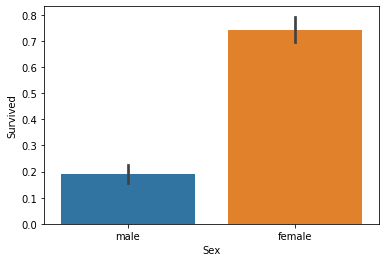

In [17]:
# Seaborn그리기. X 축에 'Sex'칼럼, Y 축에 'Survived' 칼럼, 데이터로 DataFrame 객체명 입력
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

# 아래가 생존 1의 확률 그래프

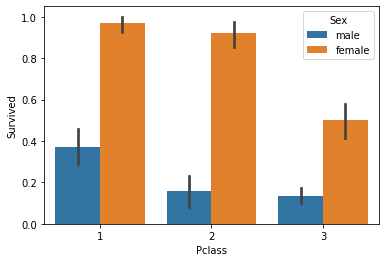

In [19]:
# 부자(객실 등급별)와 가난한 사람간의 생존 확률 + 성별
titanic_df.groupby(['Pclass', 'Sex', 'Survived'])['Survived'].count()
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df) # hue 파라미터 추가로 색상으로 나뉜 성별입력

# 결과, 1등급 (부자) 객실의 여성은 거의 100% 삶. 남자도 38% 이상 삶.

In [23]:
# 등급별 객실에 묵은 사람들 수 
titanic_df.groupby(['Pclass','Sex'])['Pclass'].count()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Pclass, dtype: int64

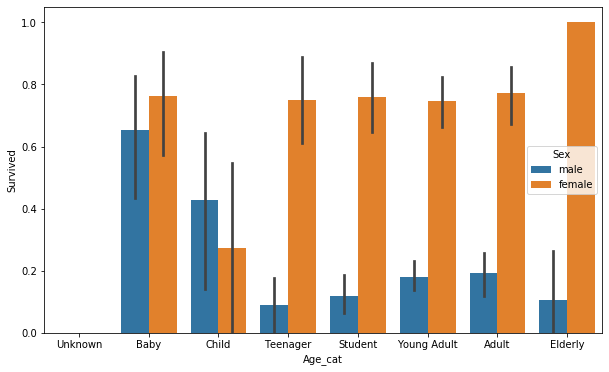

In [27]:
# 나이별 생존 확인. 
## 61세 이상은 Elderly 분류, -1 이하의 오류값은 Unknown으로 분류.

# 입력 Age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

# 이를 활용해 Sex, Age, PClass 가 중요하게 생존을 좌우하는 피처임을 확인

# 타이타닉 생존자 예측2. 데이터 전처리 수행 함수 제작 후 원본데이터 가공

## 문자열 카테고리 피처를 숫자형 카테고리 피처 변환

In [31]:
# 사이킷런의 전처리 모듈의 대부분 인코딩 API는 사이킷런의 기본 프레임워크 API인
## fit(), transform()으로 데이터를 변환함.

from sklearn import preprocessing # 전처리
def encode_features(dataDF): # 여러 칼럼을 해당 함수를 새로 생성해 한 번에 변환함.
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [34]:
titanic_df.info(['Cabin', 'Sex', 'Embarked'])  
# 위의 LabelEncoding 전처리를 통해 위 세가지 칼럼이 int64 형식으로 바뀐 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


# 지금까지 피처를 가공한 내역을 정리하고, 이를 함수로 만들어 쉽게 재사용 제작
## 데이터 전처리 전체 호출 함수 : transform_features()   : Null처리, 포매팅, 인코딩 수행

In [44]:
#########################################################################################################
from sklearn import preprocessing

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df


# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df


# Label인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()  # 오탈자. le = LabelEncoder() 라고만 되어 있었음.
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


# 앞에서 설정한 데이터전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

#########################################################################################################

### transform_features() 함수 사용해 원본 데이터 가공. 
타이타닉 생존자 데이터 세트의 레이블인 'Survived' 속성만 별도 분리해 클래스 결정값 데이터 세트로 만듬

In [45]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']   # 레이블 데이터 세트
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df) # 피처 데이터 세트. 위의 전처리 함수 사용으로 필요한 데이터만 추출

## train_test_split() API를 이용해 별도의 테스트 데이터 세트 추출 20%로.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11) # test 데이터가 20%

## 예측부분. 결정트리, 랜덤 포레스트, 로지스틱 회귀 사용
로지스틱 회귀는 매우 강력한 분류 알고리즘

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()


# 결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))


# 랜덤 포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))


# 로지스틱 회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))



# 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수 없다.

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8324
LogisticRegression 정확도: 0.8659


C:\Users\fu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\fu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 교차검증 -> 결정트리모델 평가. K-Fold, cross_val_score, GridSearchCV 사용 하이퍼파라미터 튜닝 후 결정트리에 테스트

In [55]:
############################################# 정말 어려운 구현 #############################################


from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체 생성
    kfold = KFold(n_splits = folds)
    scores = [] # 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    
    
    # K-Fold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습/예측/정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
        
    # 5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

############################################# 정말 어려운 구현 #############################################

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [56]:
# 교차 검증을 위한 cross_val_score() API 수행

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

# 정확도가 다른 이유는. cross_val_score()는 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문.

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7765
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8418
평균 정확도: 0.7835


In [58]:
# GridSearchCV로 결정트리분류의 최적 하이퍼 파라미터 찾고 예측 성능 측정.

# 단계1. CV에 5개 폴드세트 지정
# 단계2. max_depth, min_samples_split, min_samples_leaf 하이퍼 파라미터를 변경하면서 성능 측정
# 단계3. 최적 하이퍼 파라미터와 그때의 예측을 출력
# 단계4. 최적 하이퍼 파라미터로 학습된 Estimator를 이용해 위의 train_test_split()으로 분리된 테스트 데이터 세트에 예측 수행.

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_


# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


# 하이퍼 파라미터 변경 전보다 약 8% 이상 증가했는데, 일반적으로 하이퍼 파라미터 튜닝하더라도 이 정도 수준으로 증가하기는 매우 어렵다.
# -> 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것처럼 보일 뿐이다.

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


C:\Users\fu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [59]:
# 머신러닝 모델은 학습 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가되어야 한다.
# 또한 테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델의 학습과 평가는 해당 테스트 데이터 세트에만 치우친 빈약한 머신러닝 모델을 만들 가능성이 높다.

  ## 이를 해결하기 위해, 학습 데이터 세트를, 학습 데이터와 검증 데이터로 구성된 여러 개의 Fold Set로 분리해 교차 검증을 수행할 수 있다.
  ## 사이킷런은 이러한 교차 검증을 지원하기 위해 K-Fold, Stratified K-Fold, cross_val_score() 등의 다양한 클래스와 함수를 제공한다.
  ## 또한, 머신러닝 모델의 최적의 하이퍼 파라미터를 교차 검증을 통해 추출하기 위해 GridSearchCV를 제공하며 추출된 최적의 하이퍼 파라미터를 다양한 모델에 사용할 수 있다.